In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import torch
import torch.nn as nn

In [3]:
x, y = make_moons(n_samples= 1000, noise= 0.2)


Text(0, 0.5, 'x_2')

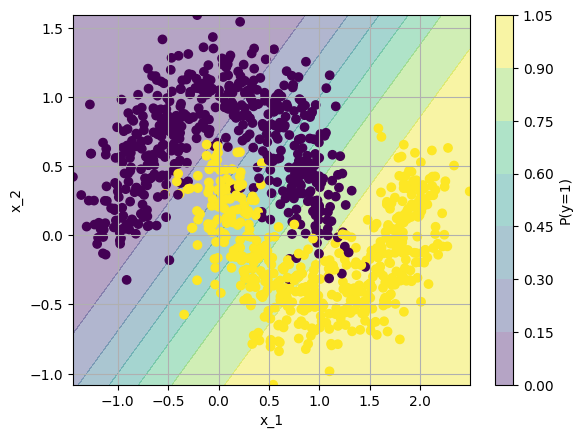

In [4]:
w1 = 2.1
w2 = -2.1
b = -0.2

x1 = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 100)
x2 = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 100)
xx1 , xx2 = np.meshgrid(x1, x2)
yy = w1*xx1 + w2 * xx2 +b
zz = 1.0/(1.0+np.exp(-yy))

c = plt.contourf(xx1,xx2, zz, alpha=0.4)
plt.clim(0,1)
plt.scatter(x[:,0], x[:,1], c=y)
plt.colorbar(c, label='P(y=1)')

plt.grid('on')
plt.xlabel("x_1")
plt.ylabel("x_2")

# Praca domowa


In [8]:
class SimpleNN(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.fc1 = nn.Linear(2,8)
        self.bn1 = nn.BatchNorm1d(8)
        self.fc2 = nn.Linear(8,8)
        self.bn2 = nn.BatchNorm1d(8)
        self.fc3 = nn.Linear(8,1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x
    
model = SimpleNN()
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [15]:
epoch = 1000
for i in range(epoch):
    inputs = torch.tensor(x, dtype=torch.float32)
    labels = torch.tensor(y.reshape(-1,1), dtype=torch.float32)
    
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    if (i+1) % 100 == 0:
        print(f'Epoch [{i+1}/{epoch}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.0879
Epoch [200/1000], Loss: 0.0870
Epoch [300/1000], Loss: 0.0861
Epoch [400/1000], Loss: 0.0852
Epoch [500/1000], Loss: 0.0844
Epoch [600/1000], Loss: 0.0839
Epoch [700/1000], Loss: 0.0834
Epoch [800/1000], Loss: 0.0827
Epoch [900/1000], Loss: 0.0821
Epoch [1000/1000], Loss: 0.0816


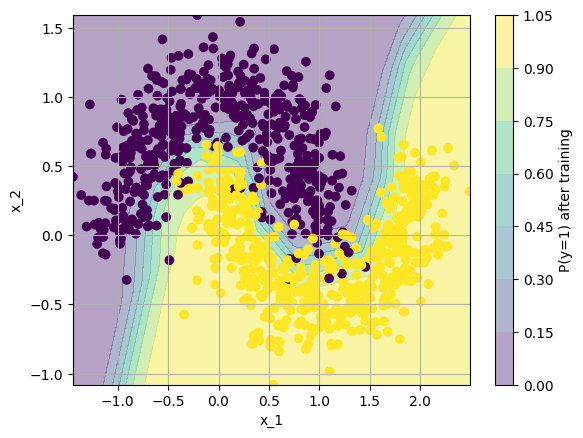

In [16]:
grid = torch.tensor(np.c_[xx1.ravel(), xx2.ravel()], dtype=torch.float32)
with torch.no_grad():
    zz_tensor = model(grid)

c = plt.contourf(xx1, xx2, zz_tensor.numpy().reshape(xx1.shape), alpha=0.4)
plt.clim(0,1)
plt.scatter(x[:,0], x[:,1], c=y)
plt.colorbar(c, label='P(y=1) after training')
plt.grid('on')
plt.xlabel("x_1")
plt.ylabel("x_2")
# Generate synthetic dataset
plt.show()
